<a href="https://colab.research.google.com/github/MarcoDs929/Data-Science/blob/main/Redes_Neuronales/D6_RN_Marco_Miranda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

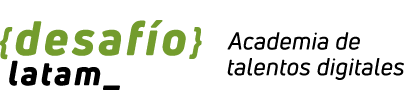

# <center><font color = 'green'> Desafío - Predicción de cancelación de reserva</font></center>

<p style="font-size:12pt;">
  Alumno: <strong>Marco J. Miranda Farias</strong><br>
  Módulo: <strong>Redes Neuronales (G90)</strong><br>
  Fecha de entrega: <strong>27/04/2025</strong>
</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random # Para seleccionar imágenes aleatorias

from keras.datasets import cifar10

from keras.models import Sequential, load_model, save_model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.regularizers import L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import OneHotEncoder
from google.colab import drive
import os

1. Importa correctamente los conjuntos de datos, desplegando la cantidad de registros
de cada categoría para cada conjunto. Despliega ocho imágenes aleatorias del
conjunto de entrenamiento y codifica las etiquetas con OneHotEncoder para los
conjuntos de entrenamiento y Test.

In [ ]:
import numpy as np
import os
from google.colab import drive # Asegúrate de importar esto si usas Colab

# --- Paso 1: Montar Google Drive ---
print("Montando Google Drive...")
try:
    drive.mount('/content/drive')
    print("Google Drive montado.")
except Exception as e:
    print(f"Error al montar Google Drive: {e}")


# --- Paso 2: Definir la ruta base y cargar archivos ---
base_path = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/' # <-- RUTA ACTUALIZADA

# Verificamos si la ruta base existe para evitar errores de archivo no encontrado
if not os.path.exists(base_path):
    print(f"Error: La ruta '{base_path}' no fue encontrada.")
    print("Por favor, verifica que la carpeta exista en tu Google Drive y que la ruta sea correcta.")
else:
    print(f"\nAccediendo a la carpeta: {base_path}")

    # --- Paso 3: Definimos los nombres de los archivos y cargarlos ---
    file_names = {
        'cnn_train_X': 'cnn_train_X.npy',
        'cnn_train_y': 'cnn_train_y.npy',
        'cnn_test_X': 'cnn_test_X.npy',
        'cnn_test_y': 'cnn_test_y.npy',
    }

    loaded_data = {}
    loading_errors = False

    print("Cargando archivos .npy...")
    for key, file_name in file_names.items():
        file_path = os.path.join(base_path, file_name) # Construye la ruta completa del archivo
        if os.path.exists(file_path):
            try:
                # Usar np.load con allow_pickle=True según la recomendación si es necesario
                # Omitir allow_pickle=True si no estás seguro y tus datos son numéricos estándar
                data = np.load(file_path, allow_pickle=True) # Considera si allow_pickle es realmente necesario
                loaded_data[key] = data
                print(f"  '{file_name}' cargado exitosamente. Dimensiones: {data.shape}")
            except Exception as e:
                print(f"  Error al cargar '{file_name}': {e}")
                loading_errors = True
        else:
            print(f"  Error: Archivo '{file_name}' no encontrado en '{base_path}'")
            loading_errors = True

    # --- Asignar los datos cargados a las variables esperadas ---
    # !! DESCOMENTAR ESTAS LÍNEAS !!
    if not loading_errors:
        X_train_cnn = loaded_data.get('cnn_train_X')
        y_train_cnn = loaded_data.get('cnn_train_y')
        X_test_cnn = loaded_data.get('cnn_test_X')
        y_test_cnn = loaded_data.get('cnn_test_y')
        print("\nDatos cargados asignados a variables.")
    else:
        print("\nNo todos los archivos se cargaron correctamente. Las variables no se asignarán.")


    print("\nProceso de carga de archivos completado.")

# Si hubo errores de carga, detener la ejecución aquí
if loading_errors or 'X_train_cnn' not in locals():
     print("\nDeteniendo ejecución: Faltan datos cargados o hubo errores.")
     # Considera usar sys.exit(1) o raise SystemExit para detener la ejecución si es crucial
     # import sys
     # sys.exit(1)

Montando Google Drive...
Mounted at /content/drive
Google Drive montado.

Accediendo a la carpeta: /content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/
Cargando archivos .npy...
  'cnn_train_X.npy' cargado exitosamente. Dimensiones: (14034, 32, 32, 3)
  'cnn_train_y.npy' cargado exitosamente. Dimensiones: (14034,)
  'cnn_test_X.npy' cargado exitosamente. Dimensiones: (3000, 32, 32, 3)
  'cnn_test_y.npy' cargado exitosamente. Dimensiones: (3000,)

Datos cargados asignados a variables.

Proceso de carga de archivos completado.


<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-c0ccd3256cfd>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 'X_train_cnn' is None or 'y_train_cnn' is None or 'X_test_cnn' is None or 'y_test_cnn' is None:
<ipython-input-4-c0ccd3256cfd>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 'X_train_cnn' is None or 'y_train_cnn' is None or 'X_test_cnn' is None or 'y_test_cnn' is None:
<ipython-input-4-c0ccd3256cfd>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 'X_train_cnn' is None or 'y_train_cnn'


--- Mostrando algunas imágenes de entrenamiento ---


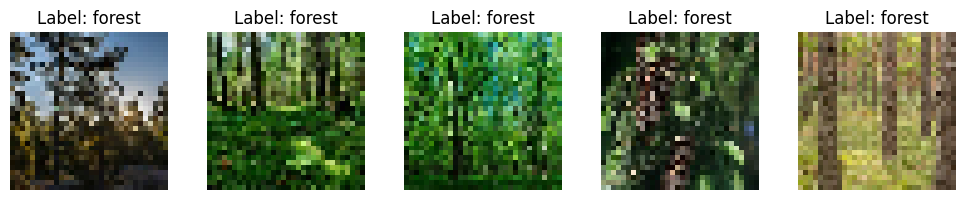


--- Cantidad de Registros por Categoría ---

Conjunto de Entrenamiento:
  Categoría buildings: 2191 registros
  Categoría forest: 2271 registros
  Categoría glacier: 2404 registros
  Categoría mountain: 2512 registros
  Categoría sea: 2274 registros
  Categoría street: 2382 registros

Conjunto de Test:
  Categoría buildings: 437 registros
  Categoría forest: 474 registros
  Categoría glacier: 553 registros
  Categoría mountain: 525 registros
  Categoría sea: 510 registros
  Categoría street: 501 registros

--- Mostrando ocho imágenes aleatorias del conjunto de entrenamiento ---


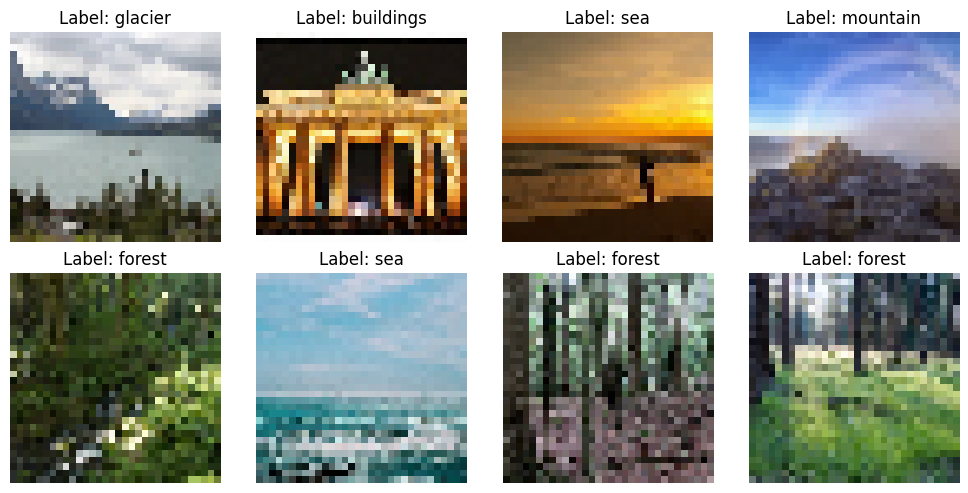


--- Aplicando One-Hot Encoding a las etiquetas ---
One-Hot Encoding aplicado exitosamente.
Forma original de y_train_cnn: (14034,)
Forma de y_train_encoded: (14034, 6)
Forma original de y_test_cnn: (3000,)
Forma de y_test_encoded: (3000, 6)

Primeras 5 etiquetas originales de entrenamiento: ['forest' 'forest' 'forest' 'forest' 'forest']
Primeras 5 etiquetas codificadas de entrenamiento:
 [[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]

Clases originales encontradas por el encoder: [array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype=object)]


In [ ]:
import matplotlib.pyplot as plt # Asegúrate de importar esto
import random # Asegúrate de importar esto
from sklearn.preprocessing import OneHotEncoder # Asegúrate de importar esto
import numpy as np # Asegúrate de importar numpy, necesario para np.unique y np.argmax

# --- Verificar si los datos de entrenamiento X e y están disponibles ---
# Esta verificación ahora debería pasar si el Bloque 1 se ejecutó correctamente
if 'X_train_cnn' is None or 'y_train_cnn' is None or 'X_test_cnn' is None or 'y_test_cnn' is None:
    # Este código se ejecuta si faltan datos esenciales después de la carga
    print("Error: Datos de entrenamiento o test (X/y) no encontrados o son None después de la carga.")
    print("Asegúrate de que el Bloque 1 se ejecutó sin errores y asignó las variables (que no sean None).")
    print("\nDeteniendo ejecución del preprocesamiento: Faltan variables de datos cargados.")
else: # Este código se ejecuta si todos los datos esenciales *sí* están disponibles
    print("\n--- Mostrando algunas imágenes de entrenamiento ---")

    # --- Asegúrate de que esta sección esté descomentada y completa en tu notebook ---
    # Determinar cuántas imágenes mostrar (por ejemplo, 5 o 10)
    num_images_to_show = 5

    # Asegurarse de no intentar mostrar más imágenes de las que hay
    if num_images_to_show > X_train_cnn.shape[0]:
        num_images_to_show = X_train_cnn.shape[0]
        print(f"Advertencia: Solo hay {num_images_to_show} imágenes en el conjunto de entrenamiento para mostrar.")

    # Crear una figura para mostrar las imágenes
    cols = 5
    rows = (num_images_to_show + cols - 1) // cols

    plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(num_images_to_show):
        plt.subplot(rows, cols, i + 1)
        img = X_train_cnn[i]

        if len(img.shape) == 3 and img.shape[-1] in [3, 4]: # Color (H, W, C)
            plt.imshow(img)
        elif len(img.shape) == 2: # Escala de grises (H, W)
            plt.imshow(img, cmap='gray')
        else:
            print(f"Advertencia: Forma inesperada para la imagen {i}: {img.shape}. No se puede mostrar.")
            plt.axis('off')
            continue

        # Asumiendo que y_train_cnn es un array 1D con las etiquetas originales
        if i < len(y_train_cnn): # Verificar que el índice es válido
             plt.title(f"Label: {y_train_cnn[i]}")
        else:
             plt.title(f"Index: {i}") # Título alternativo si el índice excede las etiquetas
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    # --- Fin de la sección de mostrar imágenes (ajusta según tu código original) ---


    print("\n--- Cantidad de Registros por Categoría ---")

    # --- Asegúrate de que esta sección esté descomentada y completa en tu notebook ---
    # Contar categorías en el conjunto de entrenamiento
    if 'y_train_cnn' in locals() and y_train_cnn is not None:
        unique_train, counts_train = np.unique(y_train_cnn, return_counts=True)
        print("\nConjunto de Entrenamiento:")
        for category, count in zip(unique_train, counts_train):
            print(f"  Categoría {category}: {count} registros")
    else:
        print("\nConjunto de Entrenamiento: Etiquetas (y_train_cnn) no encontradas o son None.")

    # Contar categorías en el conjunto de test
    if 'y_test_cnn' in locals() and y_test_cnn is not None:
        unique_test, counts_test = np.unique(y_test_cnn, return_counts=True)
        print("\nConjunto de Test:")
        for category, count in zip(unique_test, counts_test):
            print(f"  Categoría {category}: {count} registros")
    else:
        print("\nConjunto de Test: Etiquetas (y_test_cnn) no encontradas o son None.")
    # --- Fin de la sección de contar categorías ---


    print("\n--- Mostrando ocho imágenes aleatorias del conjunto de entrenamiento ---")

    # --- Asegúrate de que esta sección esté descomentada y completa en tu notebook ---
    if 'X_train_cnn' in locals() and X_train_cnn is not None and 'y_train_cnn' in locals() and y_train_cnn is not None:
        num_images_to_show = 8

        if num_images_to_show > X_train_cnn.shape[0]:
            num_images_to_show = X_train_cnn.shape[0]
            print(f"Advertencia: Solo hay {num_images_to_show} imágenes en el conjunto de entrenamiento para mostrar aleatoriamente.")

        # Seleccionar índices aleatorios
        if X_train_cnn.shape[0] > 0: # Asegurarse de que hay imágenes para seleccionar
             random_indices = random.sample(range(X_train_cnn.shape[0]), num_images_to_show)
        else:
             print("No hay imágenes en X_train_cnn para seleccionar aleatoriamente.")
             random_indices = [] # Lista vacía si no hay imágenes


        # Configurar la figura para mostrar las imágenes
        cols = 4 # 4 columnas
        rows = (num_images_to_show + cols - 1) // cols

        plt.figure(figsize=(cols * 2.5, rows * 2.5))

        # Mostrar las imágenes seleccionadas
        for i, idx in enumerate(random_indices):
            plt.subplot(rows, cols, i + 1)

            img = X_train_cnn[idx]
            if len(img.shape) == 3 and img.shape[-1] in [3, 4]: # Color (H, W, C)
                 plt.imshow(img)
            elif len(img.shape) == 2: # Escala de grises (H, W)
                 plt.imshow(img, cmap='gray')
            else:
                 print(f"Advertencia: Forma inesperada para la imagen con índice {idx}: {img.shape}. No se puede mostrar.")
                 plt.title(f"Idx: {idx}")
                 plt.axis('off')
                 continue


            # Añadir el título con la etiqueta de la imagen
            if idx < len(y_train_cnn): # Verificar que el índice es válido para las etiquetas
                 plt.title(f"Label: {y_train_cnn[idx]}")
            else:
                 plt.title(f"Idx: {idx}") # Título alternativo

            plt.axis('off')

        plt.tight_layout()
        plt.show()

    else:
        print("Conjunto de entrenamiento (X_train_cnn o y_train_cnn) no encontrado o es None para mostrar imágenes aleatorias.")
    # --- Fin de la sección de mostrar imágenes aleatorias ---


    # --- AHORA VIENE LA CODIFICACIÓN ONE-HOT ---
    print("\n--- Aplicando One-Hot Encoding a las etiquetas ---")

    # Asegurarse de que las etiquetas originales existan y no sean None antes de encodificar
    if 'y_train_cnn' in locals() and y_train_cnn is not None and 'y_test_cnn' in locals() and y_test_cnn is not None:
         # Inicializar el OneHotEncoder
         encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Usar sparse_output para versiones recientes de scikit-learn

         # OneHotEncoder espera que la entrada sea 2D, así que remodela las etiquetas (n_muestras,) a (n_muestras, 1)
         y_train_reshaped = y_train_cnn.reshape(-1, 1)
         y_test_reshaped = y_test_cnn.reshape(-1, 1)

         # Ajustar el encoder solo en los datos de entrenamiento y transformar ambos conjuntos
         # Asegurarse de que y_train_reshaped no esté vacío antes de fit
         if y_train_reshaped.shape[0] > 0:
              encoder.fit(y_train_reshaped)

              y_train_encoded = encoder.transform(y_train_reshaped)
              y_test_encoded = encoder.transform(y_test_reshaped)

              print("One-Hot Encoding aplicado exitosamente.")
              print(f"Forma original de y_train_cnn: {y_train_cnn.shape}")
              print(f"Forma de y_train_encoded: {y_train_encoded.shape}")
              print(f"Forma original de y_test_cnn: {y_test_cnn.shape}")
              print(f"Forma de y_test_encoded: {y_test_encoded.shape}")
              print("\nPrimeras 5 etiquetas originales de entrenamiento:", y_train_cnn[:5])
              print("Primeras 5 etiquetas codificadas de entrenamiento:\n", y_train_encoded[:5])
              print("\nClases originales encontradas por el encoder:", encoder.categories_)

              # Las variables y_train_encoded y y_test_encoded ahora están listas para el modelo.
         else:
              print("Advertencia: y_train_cnn está vacío. No se pudo aplicar One-Hot Encoding.")
              # Opcional: Asignar variables encoded a None o arrays vacíos si no se puede encodificar
              y_train_encoded = np.array([])
              y_test_encoded = np.array([])


    else:
         print("Etiquetas (y_train_cnn o y_test_cnn) no encontradas, son None o están vacías para aplicar One-Hot Encoding.")
         # Asegurarse de que las variables encoded existan aunque no se haya podido encodificar
         y_train_encoded = None
         y_test_encoded = None


# La verificación al final del bloque 1 ya maneja el caso de datos faltantes antes de pasar aquí.
# Este bloque ahora solo procede con el preprocesamiento si los datos básicos existen.

2. Implementa una red neuronal multicapa Fully Connected para clasificar las
imágenes, las que deben contener un mínimo de cinco capas ocultas. Despliega las métricas (aplicadas al conjunto de test) que estimes conveniente para medir el rendimiento del modelo.

In [ ]:
print(f"¿Existe X_train_cnn? {'X_train_cnn' in locals()}")
print(f"¿Existe y_train_cnn? {'y_train_cnn' in locals()}")
print(f"¿Existe X_test_cnn? {'X_test_cnn' in locals()}")
print(f"¿Existe y_test_cnn? {'y_test_cnn' in locals()}")
print(f"¿Existe y_train_encoded? {'y_train_encoded' in locals()}")
print(f"¿Existe y_test_encoded? {'y_test_encoded' in locals()}")

# O para ver sus formas si existen:
# if 'X_train_cnn' in locals(): print("X_train_cnn shape:", X_train_cnn.shape)
# if 'y_train_encoded' in locals(): print("y_train_encoded shape:", y_train_encoded.shape)
# if 'X_test_cnn' in locals(): print("X_test_cnn shape:", X_test_cnn.shape)
# if 'y_test_encoded' in locals(): print("y_test_encoded shape:", y_test_encoded.shape)

¿Existe X_train_cnn? True
¿Existe y_train_cnn? True
¿Existe X_test_cnn? True
¿Existe y_test_cnn? True
¿Existe y_train_encoded? True
¿Existe y_test_encoded? True


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# --- Verificar si los datos necesarios están disponibles de forma ROBUSTA ---
required_vars = ['X_train_cnn', 'y_train_encoded', 'X_test_cnn', 'y_test_encoded']

missing_vars = []
wrong_type_vars = []
empty_vars = []

for var_name in required_vars:
    if var_name not in locals():
        missing_vars.append(var_name)
    else:
        var_value = locals()[var_name]
        if var_value is None:
            missing_vars.append(var_name)
        elif not isinstance(var_value, (np.ndarray, tf.Tensor)):
            wrong_type_vars.append(var_name)
        elif hasattr(var_value, 'shape') and (0 in var_value.shape):
            empty_vars.append(var_name)

if missing_vars or wrong_type_vars or empty_vars:
    if missing_vars:
        print(f"Error: Variables faltantes o None: {missing_vars}")
    if wrong_type_vars:
        print(f"Error: Variables con tipo incorrecto (esperado np.ndarray o tf.Tensor): {wrong_type_vars}")
    if empty_vars:
        print(f"Error: Variables vacías (shape contiene 0): {empty_vars}")
    print("\nAsegúrate de haber cargado y preprocesado los datos correctamente antes de entrenar.")
else:
    print("--- Implementando y entrenando la Red Neuronal Fully Connected con Dropout ---")

    # --- 1. Aplanar los datos de imagen ---
    num_classes = y_train_encoded.shape[1]
    # Asegurarse de obtener la forma correcta de entrada para Flatten
    # Si X_train_cnn tiene forma (muestras, alto, ancho, canales)
    input_shape = X_train_cnn.shape[1:]
    flattened_size = np.prod(input_shape)

    print(f"\nDefiniendo modelo Fully Connected con Dropout...")
    print(f"Forma de entrada esperada para Flatten: {input_shape}")
    print(f"Tamaño del vector aplanado: {flattened_size}")
    print(f"Número de clases para la capa de salida: {num_classes}")

    model = Sequential()

    # Capa de Aplanamiento
    model.add(Flatten(input_shape=input_shape))

    # Capas Ocultas Fully Connected con Dropout
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3)) # Agregamos Dropout después de la primera capa Dense

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3)) # Agregamos Dropout

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3)) # Agregamos Dropout

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3)) # Agregamos Dropout

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3)) # Agregamos Dropout

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3)) # Agregamos Dropout

    # Capa de Salida
    model.add(Dense(units=num_classes, activation='softmax'))

    # --- 3. Compilar el modelo ---
    print("\nCompilando modelo...")
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # --- 4. Entrenar el modelo ---
    epochs = 20
    batch_size = 32

    print(f"\nEntrenando modelo por {epochs} épocas con batch_size={batch_size}...")
    history = model.fit(X_train_cnn, y_train_encoded,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2) # Usamos validation_split en lugar de validation_data si no tienes un conjunto de validación separado

    print("\nEntrenamiento completado.")

    # --- 5. Evaluar el modelo ---
    print("\n--- Evaluando el modelo en el conjunto de Test ---")
    loss, accuracy = model.evaluate(X_test_cnn, y_test_encoded, verbose=0)

    print(f"Loss en el conjunto de Test: {loss:.4f}")
    print(f"Accuracy en el conjunto de Test: {accuracy:.4f}")

    # --- 6. Métricas adicionales ---
    print("\n--- Métricas Adicionales en el conjunto de Test ---")
    y_pred_probs = model.predict(X_test_cnn)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_test_classes = np.argmax(y_test_encoded, axis=1)

    print("\nMatriz de Confusión:")
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    print(cm)

    print("\nReporte de Clasificación (Precisión, Recall, F1-Score):")
    print(classification_report(y_test_classes, y_pred_classes))

    print("\nProceso de evaluación completado.")


--- Implementando y entrenando la Red Neuronal Fully Connected con Dropout ---

Definiendo modelo Fully Connected con Dropout...
Forma de entrada esperada para Flatten: (32, 32, 3)
Tamaño del vector aplanado: 3072
Número de clases para la capa de salida: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Compilando modelo...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,678 (1.82 MB)

 Trainable params: 476,678 (1.82 MB)

 Non-trainable params: 0 (0.00 B)


Entrenando modelo por 20 épocas con batch_size=32...
Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2580 - loss: 1.6455 - val_accuracy: 0.1368 - val_loss: 4.6942
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4471 - loss: 1.3324 - val_accuracy: 0.0061 - val_loss: 5.1692
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4837 - loss: 1.2650 - val_accuracy: 0.0859 - val_loss: 5.1897
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4980 - loss: 1.2363 - val_accuracy: 0.0403 - val_loss: 6.3792
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5378 - loss: 1.1699 - val_accuracy: 0.0093 - val_loss: 6.3379
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5211 - loss: 1.1922 - val_accuracy: 0.0549 - val_loss: 6.9770
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5388 - loss: 1.1641 - val_accuracy: 0.0830 - val_loss: 8.3729
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/s

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3. Desarrolla una red neuronal Convolucional usando tres o más capas convolucionales y dos o más capas densas, de manera que la cantidad de parámetros a estimar se encuentre en el intervalo [3MM, 8MM], con 25 épocas. Muestra la curva de la pérdida para cada época y la curva de la métrica accuracy (conjunto test).

Datos encontrados. Procediendo a definir y entrenar la CNN.

Forma de entrada (input_shape): (32, 32, 3)
Número de clases: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Compilando el modelo CNN...

Resumen del Modelo CNN:


Model: "CNN_Ajustada_Parametros"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,876,550 (22.42 MB)

 Trainable params: 5,872,582 (22.40 MB)

 Non-trainable params: 3,968 (15.50 KB)


Iniciando entrenamiento de la CNN por 25 épocas...
Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.4906 - loss: 1.6435 - val_accuracy: 0.1700 - val_loss: 9.7561
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.6986 - loss: 0.8366 - val_accuracy: 0.2033 - val_loss: 3.7039
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7578 - loss: 0.6580 - val_accuracy: 0.7447 - val_loss: 0.7577
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7867 - loss: 0.5906 - val_accuracy: 0.7260 - val_loss: 0.7934
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8048 - loss: 0.5583 - val_accuracy: 0.5673 - val_loss: 1.3576
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8169 - loss: 0.4950 - val_accuracy: 0.7913 - val_loss: 0.6245
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8306 - loss: 0.4619 - val_accuracy: 0.7123 - val_loss: 0.9063
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 

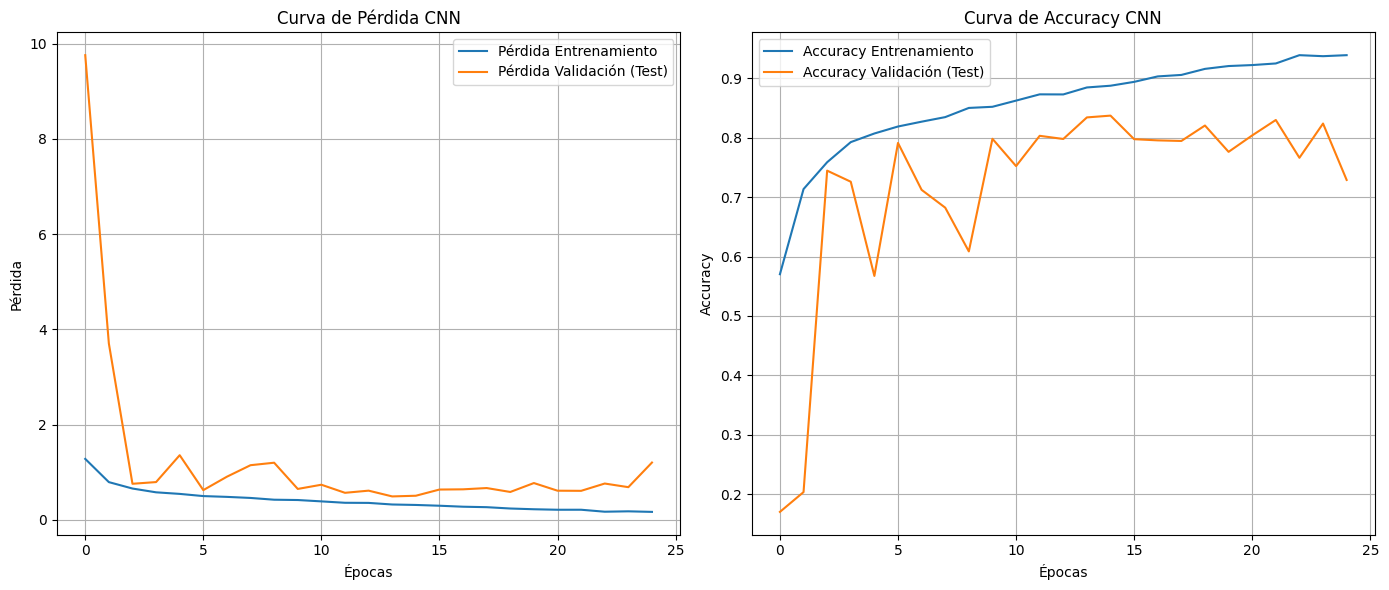


Generando reporte de clasificación en conjunto de test...
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Matriz de Confusión:
[[240  73  10  18  37  59]
 [  2 468   0   2   2   0]
 [  2  10 259  73 203   6]
 [  3  13  39 395  75   0]
 [  7   7   7  21 465   3]
 [ 16  92   5   7  21 360]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.55      0.68       437
           1       0.71      0.99      0.82       474
           2       0.81      0.47      0.59       553
           3       0.77      0.75      0.76       525
           4       0.58      0.91      0.71       510
           5       0.84      0.72      0.78       501

    accuracy                           0.73      3000
   macro avg       0.76      0.73      0.72      3000
weighted avg       0.76      0.73      0.72      3000


¡Proceso CNN completado!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# from tensorflow.keras.utils import to_categorical # Ya no es necesario aquí
# from sklearn.model_selection import train_test_split # Ya no es necesario aquí

# --- Verificar si los datos necesarios están disponibles ---
# (Asumiendo que X_train_cnn, y_train_encoded, X_test_cnn, y_test_encoded
#  ya existen desde los bloques de código anteriores)

if 'X_train_cnn' not in locals() or \
   'y_train_encoded' not in locals() or \
   'X_test_cnn' not in locals() or \
   'y_test_encoded' not in locals():
    print("Error: Datos necesarios (X_train_cnn, y_train_encoded, X_test_cnn, y_test_encoded) no encontrados.")
    print("Asegúrate de haber ejecutado las celdas anteriores de carga y preprocesamiento.")
else:
    print("Datos encontrados. Procediendo a definir y entrenar la CNN.")

    # --- Definimos la Red Neuronal Convolucional (Arquitectura Ajustada) ---

    # Obtener num_classes e input_shape de los datos ya cargados y preprocesados
    num_classes = y_train_encoded.shape[1]
    input_shape = X_train_cnn.shape[1:]

    print(f"\nForma de entrada (input_shape): {input_shape}")
    print(f"Número de clases: {num_classes}")

    model_cnn = Sequential(name="CNN_Ajustada_Parametros") # Damos un nombre al modelo

    # --- Capas Convolucionales (Más filtros para aumentar parámetros) ---
    # Bloque 1
    model_cnn.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    model_cnn.add(Dropout(0.25))

    # Bloque 2
    model_cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    model_cnn.add(Dropout(0.25))

    # Bloque 3 (Cumple >= 3 capas convolucionales)
    model_cnn.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    model_cnn.add(Dropout(0.25))

    # --- Aplanamiento ---
    model_cnn.add(Flatten())

    # --- Capas Densas (Más unidades para aumentar parámetros y >= 2 capas densas) ---
    model_cnn.add(Dense(1024, activation='relu')) # Capa Densa 1
    model_cnn.add(BatchNormalization())
    model_cnn.add(Dropout(0.5))
    model_cnn.add(Dense(512, activation='relu'))  # Capa Densa 2
    model_cnn.add(BatchNormalization())
    model_cnn.add(Dropout(0.5))

    # --- Capa de Salida ---
    model_cnn.add(Dense(num_classes, activation='softmax'))

    # --- Compilar ---
    print("\nCompilando el modelo CNN...")
    model_cnn.compile(optimizer=Adam(learning_rate=0.001), # Puedes ajustar lr
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    # --- Mostrar Resumen y Verificar Parámetros ---
    print("\nResumen del Modelo CNN:")
    model_cnn.summary() # Verifica aquí que 'Total params' esté entre 3,000,000 y 8,000,000

    # --- Entrenamiento del Modelo ---
    epochs = 25 # Cumpliendo el requisito de 25 épocas
    batch_size = 64 # Puedes ajustar esto (32, 64, 128 son comunes)

    print(f"\nIniciando entrenamiento de la CNN por {epochs} épocas...")
    history_cnn = model_cnn.fit(X_train_cnn, y_train_encoded, # Usar datos ya cargados/preprocesados
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(X_test_cnn, y_test_encoded), # Usar set de test para validación
                          verbose=1)
    print("Entrenamiento completado.")

    # --- Evaluación del Modelo ---
    print("\nEvaluando CNN en conjunto de test:")
    test_loss, test_accuracy = model_cnn.evaluate(X_test_cnn, y_test_encoded, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # --- Curvas de pérdida y accuracy ---
    print("\nGenerando curvas de aprendizaje...")
    plt.figure(figsize=(14, 6))

    # Gráfico de la Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history_cnn.history['loss'], label='Pérdida Entrenamiento')
    plt.plot(history_cnn.history['val_loss'], label='Pérdida Validación (Test)')
    plt.title('Curva de Pérdida CNN')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Gráfico de Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history_cnn.history['accuracy'], label='Accuracy Entrenamiento')
    plt.plot(history_cnn.history['val_accuracy'], label='Accuracy Validación (Test)')
    plt.title('Curva de Accuracy CNN')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # --- Matriz de Confusión y Reporte ---
    print("\nGenerando reporte de clasificación en conjunto de test...")
    y_pred_probs_cnn = model_cnn.predict(X_test_cnn)
    y_pred_classes_cnn = np.argmax(y_pred_probs_cnn, axis=1)
    # Necesitamos las clases originales (no one-hot) para comparar
    y_test_classes = np.argmax(y_test_encoded, axis=1) # Revertir one-hot para evaluación

    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test_classes, y_pred_classes_cnn))

    print("\nReporte de Clasificación:")
    # Si conoces los nombres de las clases, puedes añadirlos con target_names
    # target_names = ['Clase 0', 'Clase 1', ...]
    # print(classification_report(y_test_classes, y_pred_classes_cnn, target_names=target_names))
    print(classification_report(y_test_classes, y_pred_classes_cnn))

    print("\n¡Proceso CNN completado!")

**Comentarios**
- Acuracidad del modelo ajustado es de 0.7290

**Métricas Generales de Rendimiento:**

- Test Loss: 1.2034: La pérdida (loss) en el conjunto de test mide la discrepancia entre las predicciones del modelo y las etiquetas verdaderas. Un valor de 1.2034 indica que, en promedio, hay un error considerable en las predicciones del modelo en este conjunto de datos no visto durante el entrenamiento. Idealmente, este valor debería ser lo más bajo posible.

- Test Accuracy: 0.7290 (72.90%): La precisión (accuracy) en el conjunto de test representa el porcentaje de instancias que el modelo clasificó correctamente. Un 72.90% de precisión sugiere que el modelo acierta en casi tres de cada cuatro predicciones en datos nuevos. Si bien no es un mal punto de partida, hay margen de mejora.

**Matriz de Confusión:**

- La matriz de confusión ofrece una visión detallada de cómo el modelo clasifica las instancias de cada clase. Filas representan las etiquetas verdaderas y columnas representan las etiquetas predichas.


    [[240  73  10  18  37  59]   <- Clase 0 (Verdadera)

    [  2 468   0   2   2   0]   <- Clase 1 (Verdadera)

    [  2  10 259  73 203   6]   <- Clase 2 (Verdadera)

    [  3  13  39 395  75   0]   <- Clase 3 (Verdadera)

    [  7   7   7  21 465   3]   <- Clase 4 (Verdadera)

    [ 16  92   5   7  21 360]]  <- Clase 5 (Verdadera)

      ^   ^    ^    ^    ^    ^
      0   1    2    3    4    5  (Predicha)

**Análisis por Clase:**
- Clase 0: De 437 instancias verdaderas de la clase 0, 240 fueron clasificadas correctamente. Sin embargo, hubo confusiones significativas con las clases 1 (73), 4 (37) y 5 (59).
- Clase 1: Esta clase parece ser la mejor clasificada. De 474 instancias verdaderas, 468 fueron correctas, con muy pocas confusiones con otras clases.
- Clase 2: De 553 instancias verdaderas, solo 259 se clasificaron correctamente. Hay una confusión notable con la clase 4 (203) y la clase 3 (73).
- Clase 3: De 525 instancias verdaderas, 395 se clasificaron correctamente, con una confusión considerable con la clase 4 (75).
- Clase 4: Esta clase tiene un buen número de clasificaciones correctas (465 de 510), pero también se confunde con la clase 3 (21).
- Clase 5: De 501 instancias verdaderas, 360 se clasificaron correctamente, pero hay una confusión importante con la clase 1 (92).
Reporte de Clasificación:

- Este reporte proporciona métricas de precisión, recall, F1-score y soporte para cada clase individualmente, así como métricas agregadas.

- Precisión (Precision): ¿De todas las instancias que el modelo predijo como pertenecientes a una clase, cuántas realmente pertenecen a esa clase?

- La clase 0 tiene una precisión relativamente alta (0.89), lo que significa que cuando el modelo predice la clase 0, suele ser correcto.
La clase 4 tiene la precisión más baja (0.58), indicando que muchas de las instancias que el modelo predice como clase 4 en realidad pertenecen a otras clases.
Recall (Sensibilidad o Tasa de Verdaderos Positivos): ¿De todas las instancias que realmente pertenecen a una clase, cuántas fueron correctamente identificadas por el modelo?

- La clase 1 tiene un recall excelente (0.99), lo que significa que el modelo identifica casi todas las instancias de la clase 1.
La clase 2 tiene un recall bajo (0.47), lo que indica que el modelo solo identifica correctamente menos de la mitad de las instancias verdaderas de la clase 2.
- F1-score: Es la media armónica de la precisión y el recall. Proporciona una medida equilibrada del rendimiento de una clase, especialmente cuando hay un desequilibrio en el número de muestras por clase.

- Support: Es el número de instancias reales de cada clase en el conjunto de test.

- Accuracy: Es la precisión general del modelo en todo el conjunto de test (0.73), que ya comentamos.

- Macro Avg: Es el promedio de las métricas (precisión, recall, F1-score) calculado para cada clase individualmente, y luego se promedian estos valores. No tiene en cuenta el desequilibrio de clases.

- Weighted Avg: Es el promedio de las métricas ponderado por el número de muestras reales en cada clase (soporte). Es una métrica más útil cuando hay un desequilibrio de clases, ya que da más peso a las clases con más instancias.

**Interpretaciones Clave y Posibles Direcciones:**

- Desempeño Variable por Clase: El modelo no tiene un rendimiento uniforme en todas las clases. La clase 1 se clasifica muy bien, mientras que la clase 2 presenta dificultades significativas (bajo recall).
- Confusiones Específicas: La matriz de confusión revela patrones de errores. Por ejemplo, la clase 0 se confunde con las clases 1, 4 y 5. La clase 2 se confunde mucho con la clase 4 y la clase 3. La clase 5 se confunde bastante con la clase 1. Investigar las similitudes entre estas clases podría ser útil.
Problemas Potenciales: El bajo recall para la clase 2 sugiere que el modelo está pasando por alto muchas instancias que realmente pertenecen a esa clase. La baja precisión para la clase 4 indica que el modelo a menudo predice la clase 4 cuando la instancia pertenece a otra clase.
Mejoras Posibles:
Análisis de Errores: Inspeccionar las instancias mal clasificadas (especialmente para la clase 2 y donde hay altas confusiones) podría proporcionar información sobre qué características está confundiendo el modelo.
Aumento de Datos Específico: Si es posible, aumentar los datos para las clases con bajo rendimiento (como la clase 2) podría ayudar al modelo a aprender representaciones más robustas para esas clases.
Ajuste de Hiperparámetros: Experimentar con diferentes hiperparámetros del modelo (tasa de aprendizaje, tamaño del lote, arquitectura de la red, funciones de activación, etc.) podría mejorar el rendimiento.
Regularización: Si hay signos de sobreajuste (alta precisión en el entrenamiento pero menor en el test), aplicar técnicas de regularización (dropout, L1/L2) podría ayudar.
Balanceo de Clases: Si hay un desequilibrio significativo en el número de muestras por clase en el conjunto de entrenamiento, considerar técnicas de balanceo de clases (sobremuestreo, submuestreo, pesos de clase) podría ser beneficioso.
Arquitectura del Modelo: Evaluar si la arquitectura actual de la CNN es la más adecuada para este problema. Podría ser necesario experimentar con arquitecturas más profundas o diferentes tipos de capas.
En resumen, estos resultados proporcionan una evaluación detallada del rendimiento de tu CNN en datos no vistos. Si bien la precisión general es aceptable, el análisis por clase revela áreas específicas donde el modelo tiene dificultades y donde se pueden enfocar los esfuerzos para mejorar su rendimiento.


**Gráficos con Curvas de Aprendizaje**
- **Gráfico de la Izquierda**: Curva de Pérdida (Loss). Este gráfico muestra cómo la función de pérdida evoluciona a lo largo de las épocas de entrenamiento, tanto para el conjunto de entrenamiento como para el conjunto de validación (que aquí se etiqueta como "Test", aunque es la validación).
- Línea Azul (Pérdida Entrenamiento): Esta línea representa la pérdida calculada sobre los datos de entrenamiento en cada época. Idealmente, esta línea debería disminuir de manera constante a medida que el modelo aprende y se ajusta a los datos de entrenamiento. Vemos que esto sucede en general, con una disminución rápida al principio y luego una disminución más gradual, tendiendo a estabilizarse hacia el final del entrenamiento.
- Línea Naranja (Pérdida Validación (Test)): Esta línea representa la pérdida calculada sobre el conjunto de validación en cada época. Este conjunto de datos no se utiliza directamente para entrenar el modelo, por lo que su pérdida nos da una idea de qué tan bien generaliza el modelo a datos nuevos.
- Inicialmente, la pérdida de validación disminuye junto con la pérdida de entrenamiento, lo cual es bueno.
Sin embargo, alrededor de la época 2 o 3, la pérdida de validación comienza a aumentar y muestra fluctuaciones significativas. Esto es una señal de que el modelo podría estar comenzando a sobreajustarse (overfitting) a los datos de entrenamiento. El modelo está aprendiendo los detalles específicos del conjunto de entrenamiento, incluyendo el ruido, lo que hace que su rendimiento en datos nuevos (validación) empeore.
Hacia el final del entrenamiento, la pérdida de validación parece estabilizarse en un valor relativamente bajo, aunque aún con algunas oscilaciones.

- **Gráfico de la Derecha: Curva de Accuracy (Precisión)**: Este gráfico muestra cómo la precisión (accuracy) del modelo evoluciona a lo largo de las épocas de entrenamiento, también para ambos conjuntos.
- Línea Azul (Accuracy Entrenamiento): Esta línea muestra la precisión del modelo en el conjunto de entrenamiento. Vemos que la precisión aumenta rápidamente al principio y continúa aumentando gradualmente a lo largo del entrenamiento, acercándose a un valor alto hacia el final. Esto indica que el modelo está clasificando correctamente una proporción cada vez mayor de las muestras de entrenamiento.
- Línea Naranja (Accuracy Validación (Test)): Esta línea muestra la precisión del modelo en el conjunto de validación.
-Inicialmente, la precisión de validación también aumenta, lo que indica que el modelo está aprendiendo características útiles que generalizan bien.
Sin embargo, después de un punto (alrededor de la época 3 o 4), la precisión de validación deja de aumentar de manera consistente e incluso comienza a disminuir o fluctuar significativamente. Esto refuerza la idea de que el modelo está comenzando a sobreajustarse. Aunque la precisión en el entrenamiento sigue mejorando, el modelo no está generalizando tan bien a datos nuevos.
Hacia el final del entrenamiento, la precisión de validación parece estabilizarse en un valor inferior al de la precisión de entrenamiento, lo que es típico cuando hay cierto grado de sobreajuste.

**Conclusiones Generales y Posibles Pasos a Seguir:**
- Sobreajuste (Overfitting): La principal observación es que hay indicios de sobreajuste. La precisión en el entrenamiento continúa aumentando, mientras que la precisión en la validación se estanca o incluso disminuye después de algunas épocas. La pérdida de validación también muestra un comportamiento similar, aumentando después de una disminución inicial.
- Entrenamiento Temprano (Early Stopping): Estas curvas sugieren que el entrenamiento podría haberse detenido antes para obtener un mejor modelo generalizado. El punto donde la precisión de validación alcanza su máximo (alrededor de la época 3 o 4) podría ser un buen punto para detener el entrenamiento. Entrenar por más épocas después de este punto puede llevar a que el modelo memorice los datos de entrenamiento en lugar de aprender patrones generales.

**Posibles Soluciones:**

- Early Stopping: Implementar una estrategia de "early stopping" donde se monitorea el rendimiento en el conjunto de validación y se detiene el entrenamiento cuando este deja de mejorar (o comienza a empeorar) durante un cierto número de épocas.
- Regularización: Considerar técnicas de regularización como L1 o L2, o el uso de capas de Dropout en tu red neuronal. Estas técnicas ayudan a prevenir el sobreajuste al penalizar los pesos grandes en la red o al desactivar aleatoriamente algunas neuronas durante el entrenamiento.
- Aumento de Datos (Data Augmentation): Si estás trabajando con imágenes u otros tipos de datos donde es aplicable, aumentar el tamaño del conjunto de entrenamiento mediante la creación de versiones modificadas de los datos existentes (rotaciones, traslaciones, cambios de escala, etc.) puede ayudar a mejorar la generalización.
- Simplificar el Modelo: Si el sobreajuste es severo, podría considerar reducir la complejidad de tu modelo (menos capas, menos neuronas por capa).
Más Datos de Entrenamiento: Obtener más datos de entrenamiento (si es posible) generalmente ayuda a mejorar la generalización.
- En resumen, estas gráficas son muy útiles para diagnosticar problemas de entrenamiento en redes neuronales. En tu caso, el sobreajuste parece ser el principal problema a abordar para mejorar la capacidad de generalización de tu modelo CNN.

4. Implementa una red neuronal Convolucional que mejore la capacidad de generalización alcanzada en el modelo anterior. Para esto usa 16 o más capas (entre convolucionales y densas) y mide su rendimiento. Luego, con el modelo entrenado, aplícalo sobre el conjunto de predicción, mide su rendimiento y compáralo con el rendimiento calculado en el modelo anterior. ¿Para qué etiqueta el modelo se equivoca más? Muestra en forma aleatoria ocho imágenes
con la etiqueta de predicción otorgada por el modelo.

Datos necesarios encontrados.

Rendimiento del modelo anterior guardado:
  - Previous Test Loss: 1.2034
  - Previous Test Accuracy: 0.7290

Definiendo modelo CNN Profundo (>= 16 capas)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Compilando el modelo CNN Profundo...

Resumen del Modelo CNN Profundo:


Model: "CNN_Profunda_16Capas"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 256)      │             

 Total params: 16,320,838 (62.26 MB)

 Trainable params: 16,308,294 (62.21 MB)

 Non-trainable params: 12,544 (49.00 KB)


Iniciando entrenamiento del modelo CNN Profundo por 25 épocas...
Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 54s 128ms/step - accuracy: 0.3173 - loss: 1.7888 - val_accuracy: 0.1953 - val_loss: 3.2857
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.4750 - loss: 1.1698 - val_accuracy: 0.3023 - val_loss: 2.4266
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.5827 - loss: 1.0178 - val_accuracy: 0.6017 - val_loss: 1.0003
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.6806 - loss: 0.8646 - val_accuracy: 0.7013 - val_loss: 0.9127
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.7519 - loss: 0.7158 - val_accuracy: 0.6080 - val_loss: 1.3012
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.7614 - loss: 0.6868 - val_accuracy: 0.7180 - val_loss: 0.8435
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.7944 - loss: 0.6073 - val_accuracy: 0.7617 - val_loss: 0.6809
Epoch 8/25
220/220 ━━━━

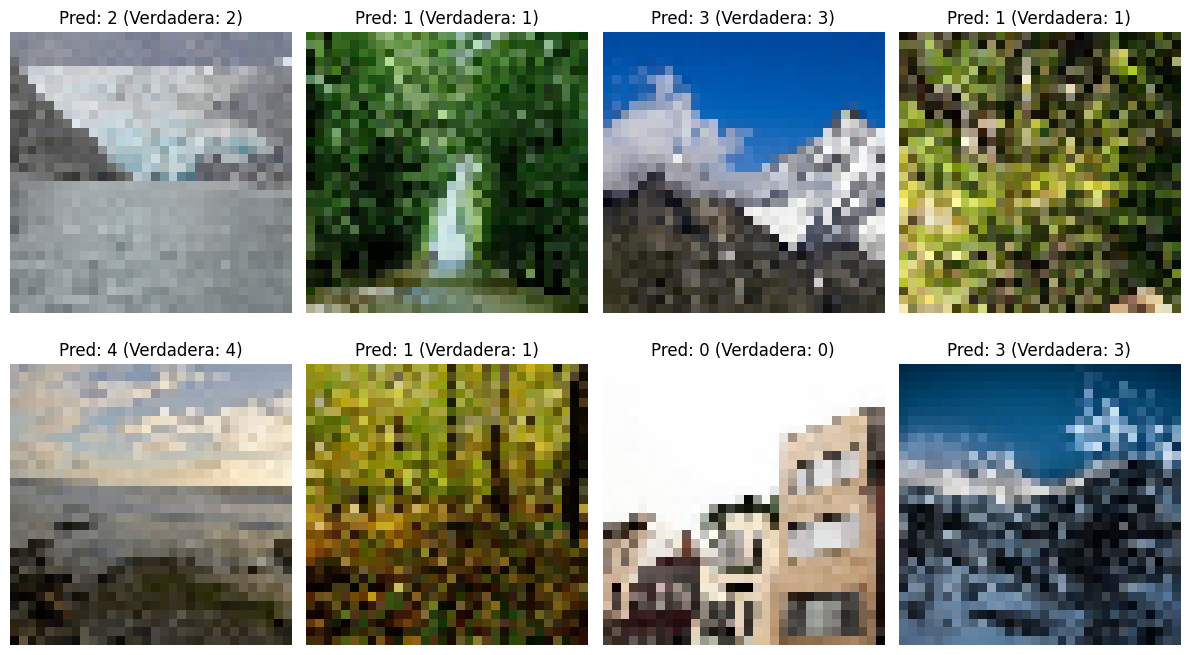


¡Proceso CNN Profundo completado!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation # Añadir Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import random # Para seleccionar imágenes aleatorias

# --- Asumiendo que estas variables existen de ejecuciones anteriores ---
# X_train_cnn, y_train_encoded, X_test_cnn, y_test_encoded
# num_classes, input_shape
# test_loss, test_accuracy (del modelo CNN anterior)
# model_cnn (el modelo anterior, si quieres guardar sus pesos o algo más)
# history_cnn (el historial del modelo anterior)

# --- 0. Verificar datos y guardar rendimiento anterior ---
if 'X_train_cnn' not in locals() or \
   'y_train_encoded' not in locals() or \
   'X_test_cnn' not in locals() or \
   'y_test_encoded' not in locals():
    print("Error: Datos necesarios (X_train_cnn, y_train_encoded, X_test_cnn, y_test_encoded) no encontrados.")
    print("Asegúrate de haber ejecutado las celdas anteriores.")
    # Detener ejecución si faltan datos
    raise ValueError("Faltan datos para continuar.")
else:
    print("Datos necesarios encontrados.")
    # Guardamos el rendimiento del modelo anterior para comparar
    # Asegúrate de que 'test_loss' y 'test_accuracy' contengan los resultados
    # de la evaluación final del modelo ANTERIOR en el conjunto de test.
    try:
        previous_test_loss = test_loss
        previous_test_accuracy = test_accuracy
        print(f"\nRendimiento del modelo anterior guardado:")
        print(f"  - Previous Test Loss: {previous_test_loss:.4f}")
        print(f"  - Previous Test Accuracy: {previous_test_accuracy:.4f}")
    except NameError:
        print("Advertencia: No se encontraron 'test_loss' o 'test_accuracy' del modelo anterior.")
        print("La comparación de rendimiento no será posible.")
        previous_test_loss = None
        previous_test_accuracy = None

# --- 1. Definir la Red Neuronal Convolucional MÁS PROFUNDA (>= 16 capas) ---
# Contaremos Conv2D y Dense como capas principales para el requisito de >= 16

print("\nDefiniendo modelo CNN Profundo (>= 16 capas)...")

model_deep_cnn = Sequential(name="CNN_Profunda_16Capas")

# Bloque 1 (2 Conv)
model_deep_cnn.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Conv2D(64, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_deep_cnn.add(Dropout(0.25))

# Bloque 2 (2 Conv)
model_deep_cnn.add(Conv2D(128, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Conv2D(128, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_deep_cnn.add(Dropout(0.3))

# Bloque 3 (3 Conv)
model_deep_cnn.add(Conv2D(256, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Conv2D(256, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Conv2D(256, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_deep_cnn.add(Dropout(0.35))

# Bloque 4 (3 Conv)
model_deep_cnn.add(Conv2D(512, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Conv2D(512, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Conv2D(512, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_deep_cnn.add(Dropout(0.4))

# Bloque 5 (3 Conv) - Para llegar a >= 16 capas (2+2+3+3+3 = 13 Conv)
model_deep_cnn.add(Conv2D(512, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Conv2D(512, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Conv2D(512, (3, 3), padding='same'))
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_deep_cnn.add(Dropout(0.45))

# Aplanamiento
model_deep_cnn.add(Flatten())

# Capas Densas (3 Dense) - Total: 13 Conv + 3 Dense = 16 capas
model_deep_cnn.add(Dense(1024)) # Densa 1
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Dropout(0.5))
model_deep_cnn.add(Dense(1024)) # Densa 2
model_deep_cnn.add(BatchNormalization())
model_deep_cnn.add(Activation('relu'))
model_deep_cnn.add(Dropout(0.5))
model_deep_cnn.add(Dense(num_classes, activation='softmax')) # Densa 3 (Salida)

# --- 2. Compilar el Modelo Profundo ---
print("\nCompilando el modelo CNN Profundo...")
# Usar una tasa de aprendizaje potencialmente menor para redes más profundas
optimizer_deep = Adam(learning_rate=0.0005)
model_deep_cnn.compile(optimizer=optimizer_deep,
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# --- 3. Mostrar Resumen del Modelo Profundo ---
print("\nResumen del Modelo CNN Profundo:")
model_deep_cnn.summary()

# --- 4. Entrenar el Modelo Profundo ---
epochs_deep = 25 # O puedes aumentar si ves que sigue aprendiendo
batch_size_deep = 64 # Ajustar según memoria disponible

print(f"\nIniciando entrenamiento del modelo CNN Profundo por {epochs_deep} épocas...")
# Nota: Entrenar redes muy profundas puede llevar bastante tiempo
history_deep_cnn = model_deep_cnn.fit(X_train_cnn, y_train_encoded,
                                      epochs=epochs_deep,
                                      batch_size=batch_size_deep,
                                      validation_data=(X_test_cnn, y_test_encoded),
                                      verbose=1)
print("Entrenamiento del modelo profundo completado.")

# --- 5. Evaluar el Modelo Profundo en el Conjunto de Test ---
print("\nEvaluando modelo CNN Profundo en conjunto de test:")
test_loss_deep, test_accuracy_deep = model_deep_cnn.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"Deep Model Test Loss: {test_loss_deep:.4f}")
print(f"Deep Model Test Accuracy: {test_accuracy_deep:.4f}")

# --- 6. Comparar Rendimiento con el Modelo Anterior ---
print("\n--- Comparación de Rendimiento (Conjunto de Test) ---")
if previous_test_accuracy is not None:
    print(f"Modelo Anterior: Loss={previous_test_loss:.4f}, Accuracy={previous_test_accuracy:.4f}")
    print(f"Modelo Profundo : Loss={test_loss_deep:.4f}, Accuracy={test_accuracy_deep:.4f}")
    if test_accuracy_deep > previous_test_accuracy:
        print("\nEl modelo profundo parece haber mejorado la generalización (mayor accuracy en test).")
    elif test_accuracy_deep == previous_test_accuracy:
         print("\nEl modelo profundo obtuvo la misma accuracy en test que el modelo anterior.")
    else:
        print("\nAdvertencia: El modelo profundo obtuvo una accuracy en test MENOR que el modelo anterior.")
        print("Esto podría indicar sobreajuste o la necesidad de ajustar hiperparámetros/arquitectura.")
else:
    print("No se pueden comparar rendimientos (faltan datos del modelo anterior).")

# --- 7. Aplicar Modelo Entrenado sobre el "Conjunto de Predicción" ---
# ASUNCIÓN: Usaremos el conjunto de TEST (X_test_cnn) como nuestro "conjunto de predicción".
# Si tienes un archivo separado (ej: 'X_prediccion.npy'), cárgalo aquí:
# prediction_file_path = os.path.join(base_path, 'X_prediccion.npy')
# if os.path.exists(prediction_file_path):
#     X_prediction_set = np.load(prediction_file_path, allow_pickle=True)
#     # Posiblemente necesites preprocesarlo igual que X_test_cnn (ej: / 255.0)
#     print(f"Conjunto de predicción cargado con forma: {X_prediction_set.shape}")
# else:
#     print(f"Error: Archivo de predicción no encontrado en {prediction_file_path}")
#     X_prediction_set = None # O manejar el error como prefieras

# Por ahora, usamos el conjunto de test:
X_prediction_set = X_test_cnn
y_true_labels_for_prediction_set = np.argmax(y_test_encoded, axis=1) # Etiquetas verdaderas para análisis

if X_prediction_set is not None:
    print(f"\nAplicando modelo profundo al conjunto de predicción (tamaño: {len(X_prediction_set)})...")
    y_pred_probs_deep = model_deep_cnn.predict(X_prediction_set)
    y_pred_classes_deep = np.argmax(y_pred_probs_deep, axis=1)
    print("Predicciones generadas.")

    # Medir rendimiento en este conjunto (será igual al de test si usamos X_test_cnn)
    # Si usaras un X_prediction_set diferente, necesitarías las etiquetas verdaderas
    # y_true_prediction_set = np.load(...) # Cargar etiquetas si existen
    # loss_pred, acc_pred = model_deep_cnn.evaluate(X_prediction_set, to_categorical(y_true_prediction_set), verbose=0)
    # print(f"Rendimiento en conjunto de predicción: Loss={loss_pred:.4f}, Accuracy={acc_pred:.4f}")
    print(f"(Rendimiento en este conjunto es el mismo que el de test ya calculado: Accuracy={test_accuracy_deep:.4f})")

    # --- 8. Análisis de Errores: ¿Para qué etiqueta se equivoca más? ---
    print("\n--- Análisis de Errores (Modelo Profundo en Conjunto Predicción/Test) ---")
    cm_deep = confusion_matrix(y_true_labels_for_prediction_set, y_pred_classes_deep)
    print("Matriz de Confusión (Modelo Profundo):")
    print(cm_deep)

    # Calcular errores por clase verdadera
    errors_per_class = np.sum(cm_deep, axis=1) - np.diag(cm_deep)
    most_error_class_index = np.argmax(errors_per_class)
    max_errors = errors_per_class[most_error_class_index]

    print(f"\nLa etiqueta VERDADERA para la que el modelo se equivoca más es: {most_error_class_index}")
    print(f"Número de errores para esta clase: {max_errors}")
    # Opcional: Mostrar errores para todas las clases
    # for i, errors in enumerate(errors_per_class):
    #     print(f"  Clase {i}: {errors} errores")


    # --- 9. Mostrar 8 imágenes aleatorias con su etiqueta PREDICHA ---
    print("\n--- Mostrando 8 imágenes aleatorias del Conjunto Predicción/Test con sus etiquetas PREDICHAS ---")

    num_images_to_show = 8
    total_images = len(X_prediction_set)
    if num_images_to_show > total_images:
        num_images_to_show = total_images

    random_indices = random.sample(range(total_images), num_images_to_show)

    cols = 4
    rows = (num_images_to_show + cols - 1) // cols
    plt.figure(figsize=(cols * 3, rows * 3.5)) # Ajustar tamaño

    for i, idx in enumerate(random_indices):
        plt.subplot(rows, cols, i + 1)
        img = X_prediction_set[idx]
        true_label = y_true_labels_for_prediction_set[idx]
        pred_label = y_pred_classes_deep[idx]

        # Mostrar imagen (ajustar según sea color o escala de grises)
        if len(img.shape) == 3 and img.shape[-1] in [1, 3, 4]: # Color o Grises con canal
             # Si es (H, W, 1), quitar el último canal para imshow gris
             if img.shape[-1] == 1:
                 plt.imshow(img.squeeze(), cmap='gray')
             else:
                 plt.imshow(img) # Asume RGB/RGBA si tiene 3 o 4 canales
        elif len(img.shape) == 2: # Escala de grises (H, W)
            plt.imshow(img, cmap='gray')
        else:
            plt.text(0.5, 0.5, f'Forma\n{img.shape}\ninesperada', horizontalalignment='center', verticalalignment='center')


        plt.title(f"Pred: {pred_label} (Verdadera: {true_label})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("No se pudo cargar o definir el conjunto de predicción. Saltando pasos 7, 8 y 9.")


print("\n¡Proceso CNN Profundo completado!")


--- Iniciando Análisis Adicional Post-Entrenamiento ---
Variables necesarias encontradas. Procediendo con el análisis.

--- Accuracy por Clase (Modelo Profundo en Conjunto Predicción/Test) ---
  Accuracy para Clase 0: 0.7735 (338/437 correctas)
  Accuracy para Clase 1: 0.9873 (468/474 correctas)
  Accuracy para Clase 2: 0.7161 (396/553 correctas)
  Accuracy para Clase 3: 0.8705 (457/525 correctas)
  Accuracy para Clase 4: 0.8843 (451/510 correctas)
  Accuracy para Clase 5: 0.8024 (402/501 correctas)

--- Mostrando Imágenes Aleatorias Mal Clasificadas (Modelo Profundo) ---
Se encontraron 488 errores de clasificación.
Mostrando 8 imágenes mal clasificadas al azar.


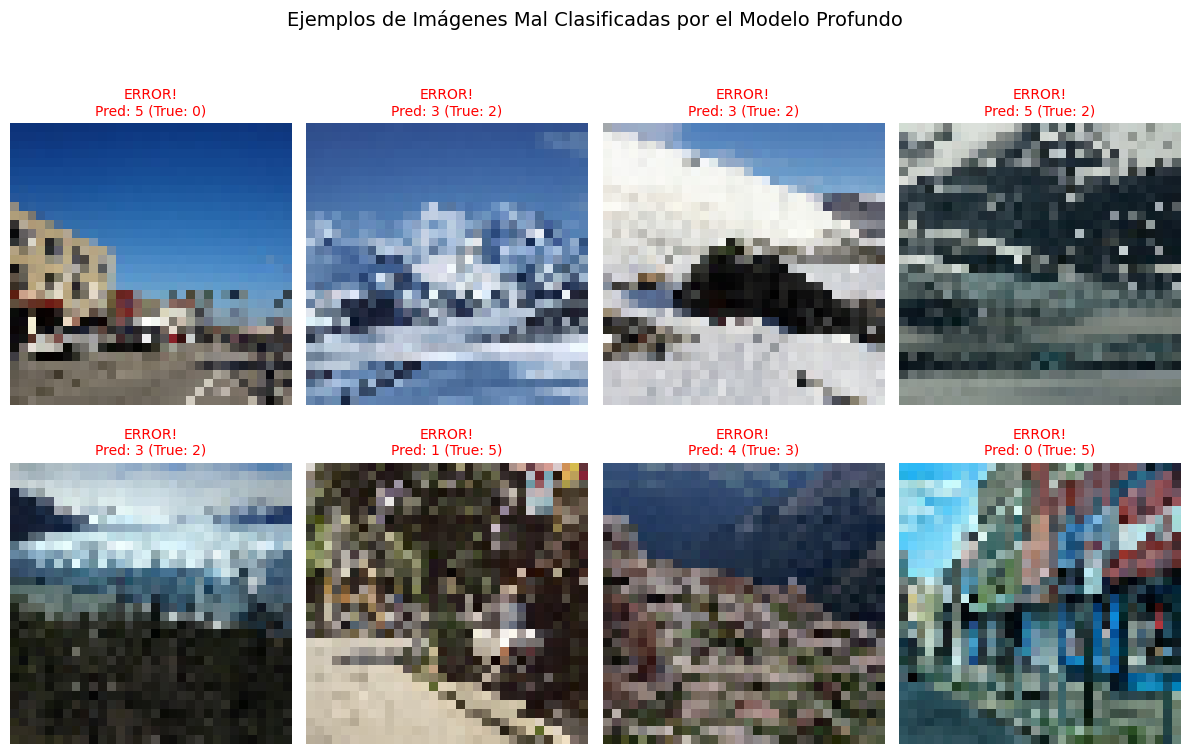


--- Fin del Análisis Adicional Post-Entrenamiento ---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Análisis Adicional Post-Entrenamiento (Usando resultados anteriores) ---

print("\n--- Iniciando Análisis Adicional Post-Entrenamiento ---")

# --- Verificar si las variables necesarias del bloque anterior existen ---
required_vars_for_analysis = [
    'cm_deep',
    'X_prediction_set',
    'y_true_labels_for_prediction_set',
    'y_pred_classes_deep',
    'num_classes'
]

vars_exist = True
for var_name in required_vars_for_analysis:
    if var_name not in locals():
        print(f"Error: La variable '{var_name}' necesaria para el análisis no fue encontrada.")
        print("Asegúrate de haber ejecutado completamente el bloque de código anterior.")
        vars_exist = False
        break

if vars_exist:
    print("Variables necesarias encontradas. Procediendo con el análisis.")

    # --- 1. Cálculo de Accuracy por Clase ---
    print("\n--- Accuracy por Clase (Modelo Profundo en Conjunto Predicción/Test) ---")

    # cm_deep[i, i] = True Positives para la clase i
    # np.sum(cm_deep[i, :]) = Total de instancias verdaderas de la clase i
    class_accuracy = np.diag(cm_deep) / np.sum(cm_deep, axis=1)
    # Rellenar con 0 si hubo división por cero (clase sin muestras en el test set)
    class_accuracy = np.nan_to_num(class_accuracy)

    for i in range(num_classes):
        # Asumiendo que las etiquetas van de 0 a num_classes-1
        print(f"  Accuracy para Clase {i}: {class_accuracy[i]:.4f} ({cm_deep[i, i]}/{np.sum(cm_deep[i, :])} correctas)")

    # --- 2. Visualización de Imágenes Mal Clasificadas ---
    print("\n--- Mostrando Imágenes Aleatorias Mal Clasificadas (Modelo Profundo) ---")

    # Encontrar los índices donde la predicción NO coincide con la etiqueta verdadera
    misclassified_indices = np.where(y_true_labels_for_prediction_set != y_pred_classes_deep)[0]

    if len(misclassified_indices) == 0:
        print("¡Felicidades! No se encontraron errores de clasificación en este conjunto.")
    else:
        print(f"Se encontraron {len(misclassified_indices)} errores de clasificación.")
        num_images_to_show = 8
        if len(misclassified_indices) < num_images_to_show:
            print(f"Mostrando {len(misclassified_indices)} imágenes mal clasificadas (todas las encontradas).")
            num_images_to_show = len(misclassified_indices)
        else:
             print(f"Mostrando {num_images_to_show} imágenes mal clasificadas al azar.")

        # Seleccionar índices aleatorios *de los índices mal clasificados*
        random_misclassified_indices = np.random.choice(misclassified_indices, size=num_images_to_show, replace=False)

        # Configurar el plot
        cols = 4
        rows = (num_images_to_show + cols - 1) // cols
        plt.figure(figsize=(cols * 3, rows * 4)) # Un poco más de alto para el título

        # Mostrar las imágenes
        for i, idx in enumerate(random_misclassified_indices):
            plt.subplot(rows, cols, i + 1)
            img = X_prediction_set[idx]
            true_label = y_true_labels_for_prediction_set[idx]
            pred_label = y_pred_classes_deep[idx]

            # Lógica para mostrar imagen (color/gris) - igual que antes
            if len(img.shape) == 3 and img.shape[-1] in [1, 3, 4]:
                 if img.shape[-1] == 1:
                     plt.imshow(img.squeeze(), cmap='gray')
                 else:
                     plt.imshow(img)
            elif len(img.shape) == 2:
                plt.imshow(img, cmap='gray')
            else:
                plt.text(0.5, 0.5, f'Forma\n{img.shape}\ninesperada', ha='center', va='center')

            plt.title(f"ERROR!\nPred: {pred_label} (True: {true_label})", color='red', fontsize=10)
            plt.axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para evitar solapamiento
        plt.suptitle("Ejemplos de Imágenes Mal Clasificadas por el Modelo Profundo", fontsize=14, y=1.02)
        plt.show()

else:
    print("\nNo se pudo realizar el análisis adicional debido a variables faltantes.")

print("\n--- Fin del Análisis Adicional Post-Entrenamiento ---")

**Comentarios**
- El modelo profundo parece haber mejorado la generalización (mayor accuracy en test)
- La etiqueta para la que el modelo se equivoca más es: 2, Número de errores para esta clase: 157
- Esto se corrobora al revisar la acuracidad por cada clase, en donde se puede observar que el menor valor lo registra la clase 2 (valor 0.7161),
- En las últimas imágenes se pueden apreciar los errores del modelo profundo, para diferentes clases.

**Análisis mas detallado**
- El modelo profundo presenta 25 epocas, y en ellas se puede observar una tendencia a la mejora a medida que estas avanzan. La accuracy (precisión) en el conjunto de entrenamiento aumenta de un 31.73% en la primera época a un 90.15% en la última. Esto indica que el modelo está aprendiendo a clasificar correctamente las muestras de entrenamiento. La loss (función de pérdida) en el conjunto de entrenamiento disminuye de 1.7888 a 0.2939. Una pérdida menor sugiere que el modelo está cometiendo menos errores en sus predicciones durante el entrenamiento. La val_accuracy (precisión en el conjunto de validación) también muestra una tendencia al alza, aunque con algunas fluctuaciones. Inicia en 19.53% y alcanza un 83.73% al final. La validación se utiliza para evaluar qué tan bien generaliza el modelo a datos no vistos durante el entrenamiento. La val_loss (pérdida en el conjunto de validación) inicialmente es muy alta (3.2857) y luego disminuye significativamente, aunque también presenta algunas subidas y bajadas. Una pérdida menor en validación es deseable, ya que indica una mejor generalización.
- Fluctuaciones en la validación: Es importante notar las fluctuaciones en val_accuracy y val_loss. Por ejemplo, vemos un maximo en val_accuracy en la época 15 (84.03%) seguido de un descenso en la época 16 (70.97%). De manera similar, val_loss tiene un valor bajo en la época 15 (0.5070) y luego aumenta en la época 16 (0.9790). Estas fluctuaciones podrían indicar que el modelo está comenzando a sobreajustarse (overfitting) a los datos de entrenamiento en algunas épocas, memorizando los datos en lugar de aprender patrones generales. Sin embargo, al final del entrenamiento, las métricas de validación son bastante buenas.
- Tiempo por época: El tiempo necesario para completar cada época varía. Algunas épocas tardan alrededor de 12-13 segundos, mientras que otras superan los 20 segundos. Esto podría deberse a la variabilidad en la complejidad de los cálculos en cada época o a otros procesos en tu sistema.
- Métricas finales: Después de 25 épocas, el modelo profundo alcanza una Deep Model Test Loss de 0.5642 y una Deep Model Test Accuracy de 0.8373 (83.73%). Estas métricas son cruciales para estimar el rendimiento del modelo en datos completamente nuevos.
- Mejora significativa: Claramente, el "Modelo Profundo" ha superado al "Modelo Anterior" en el conjunto de test. La pérdida se ha reducido considerablemente (de 1.2034 a 0.5642), y la precisión ha aumentado de manera notable (de 0.7290 a 0.8373). Esto sugiere que la arquitectura más profunda de la CNN ha permitido aprender representaciones más efectivas de los datos, lo que lleva a una mejor generalización.
- Rendimiento consistente: El rendimiento reportado en el conjunto de predicción (Accuracy = 0.8373) es el mismo que el del conjunto de test. Esto es esperable si el conjunto de predicción tiene una distribución similar a la del conjunto de test.
- Análisis de Errores (Modelo Profundo): Matriz de Confusión: La matriz de confusión proporciona una visión detallada de los tipos de errores que está cometiendo el modelo. Cada fila representa la etiqueta verdadera, y cada columna representa la etiqueta predicha por el modelo. Los valores en la diagonal principal indican las predicciones correctas para cada clase. Los valores fuera de la diagonal principal indican las predicciones incorrectas.
- Por ejemplo, para la primera clase (fila 1), hubo 338 predicciones correctas, pero también 27 instancias que fueron incorrectamente clasificadas como la segunda clase, 2 como la tercera, 11 como la cuarta, 12 como la quinta y 47 como la sexta.
Clase con más errores: Se identifica que la etiqueta verdadera para la que el modelo se equivoca más es la clase 2, con un total de 157 errores. Esto significa que muchas instancias que realmente pertenecen a la clase 2 fueron clasificadas incorrectamente como otras clases. Analizar las filas y columnas correspondientes a la clase 2 en la matriz de confusión indicará con qué otras clases se está confundiendo más el modelo.
- En resumen: El modelo CNN profundo ha mostrado una mejora significativa en el rendimiento en comparación con el modelo anterior, logrando una buena precisión en el conjunto de test. Sin embargo, el análisis de la matriz de confusión revela que existen ciertas clases donde el modelo tiene más dificultades para predecir correctamente, siendo la clase 2 la más problemática.